<a href="https://www.kaggle.com/code/anand1994sp/facial-expression?scriptVersionId=119422806" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-expressions/images/validation/surprise/13288.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/24201.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/26556.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/26076.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/27577.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/27973.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/26452.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/10162.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/12768.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/12551.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/13205.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/21154.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surpr

source: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions

In [2]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2

tf.random.set_seed(23)

In [3]:
data_dir = '../input/facial-emotion-expressions/images'
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + "/train")
classes_valid = os.listdir(data_dir + "/validation")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

['validation', 'images', 'train']
Train Classes - ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Validation Classes - ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [4]:
# Creating the Pathlib PATH objects
train_path = Path("/kaggle/input/facial-emotion-expressions/images/train")
valid_path = Path("/kaggle/input/facial-emotion-expressions/images/validation")

Define constants

In [5]:
batch_size = 64
epochs = 40
img_channel = 3
img_width, img_height = (48,48)
train_dataset_main = data_dir + "/train"
valid_dataset_main = data_dir + "/validation"

Prepare datasets


In [6]:
def create_dataset_df(main_path, dataset_name):
    print(f"{dataset_name} is creating ...")
    df = {"img_path":[],"class_names":[]}
    for class_names in os.listdir(main_path):
            for img_path in glob.glob(f"{main_path}/{class_names}/*"):
                df["img_path"].append(img_path)
                df["class_names"].append(class_names)
    df = pd.DataFrame(df)
    print(f"{dataset_name} is created !")
    return df

In [7]:
train_df = create_dataset_df(train_dataset_main, "Train dataset")

Train dataset is creating ...
Train dataset is created !


In [8]:
valid_df=create_dataset_df(valid_dataset_main, "Validation dataset")

Validation dataset is creating ...
Validation dataset is created !


In [9]:
train_df.sample(5)

img_path class_names
17275  ../input/facial-emotion-expressions/images/tra...         sad
26266  ../input/facial-emotion-expressions/images/tra...       happy
27934  ../input/facial-emotion-expressions/images/tra...       happy
19110  ../input/facial-emotion-expressions/images/tra...         sad
2505   ../input/facial-emotion-expressions/images/tra...    surprise

In [10]:
valid_df.sample(5)

img_path class_names
2803  ../input/facial-emotion-expressions/images/val...     neutral
3189  ../input/facial-emotion-expressions/images/val...     neutral
6800  ../input/facial-emotion-expressions/images/val...       happy
1768  ../input/facial-emotion-expressions/images/val...        fear
1236  ../input/facial-emotion-expressions/images/val...        fear

In [11]:
print(f"train samples: {len(train_df)} \n validation samples: {len(valid_df)}")

train samples: 28821 
 validation samples: 7066


Visualization

In [12]:
def vizualizing_images(df,n_rows,n_cols):
    plt.figure(figsize=(10,10))
    for i in range(n_rows*n_cols):
        index = np.random.randint(0, len(df))
        img = cv2.imread(df.img_path[index])
        class_nm = df.class_names[index]
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(img)
        plt.title(class_nm)
    plt.show()

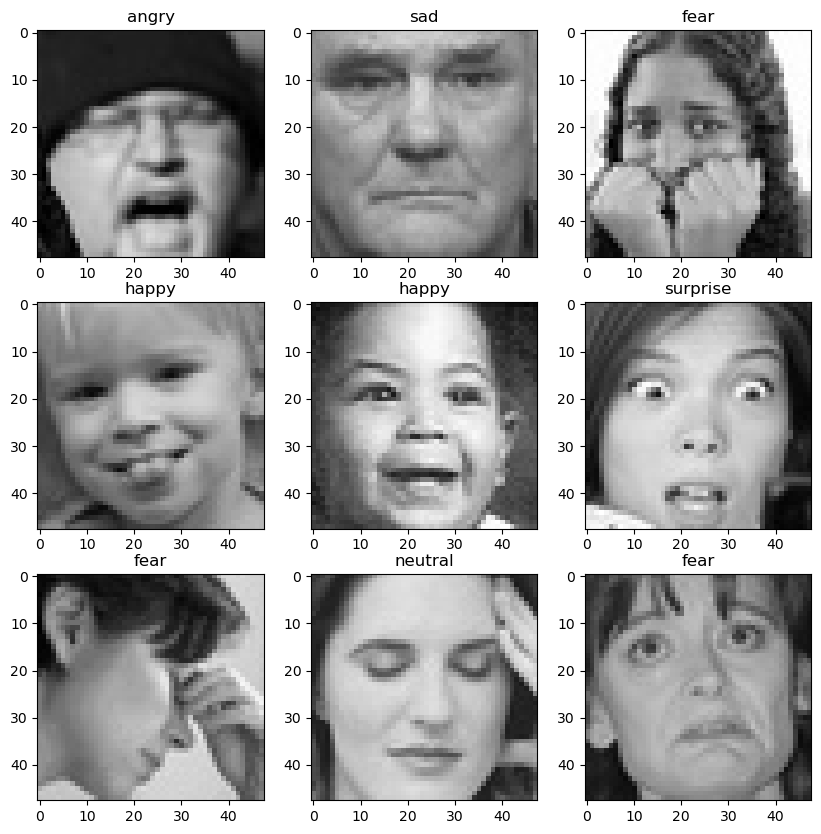

In [13]:
vizualizing_images(train_df, 3, 3)

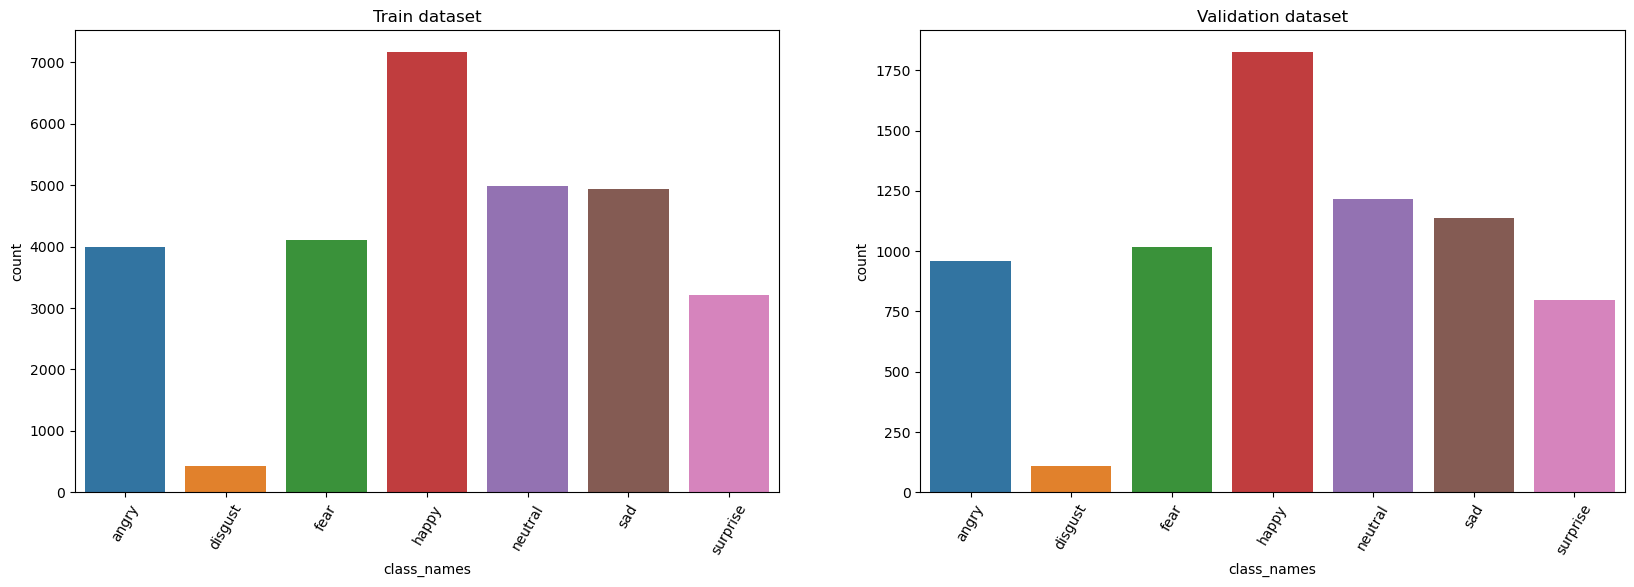

In [14]:
plt.figure(figsize=(20,6))
# train dataset
plt.subplot(1,2,1)
sns.countplot(data=train_df.sort_values("class_names"),x="class_names")
plt.title("Train dataset")
plt.xticks(rotation = 60)
# validation dataset
plt.subplot(1,2,2)
sns.countplot(data=valid_df.sort_values("class_names"),x="class_names")
plt.title("Validation dataset")
plt.xticks(rotation = 60)

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_df["class_names"] = Le.fit_transform(train_df["class_names"])

train_df["class_names"].value_counts()

3    7164
4    4982
5    4938
2    4103
0    3993
6    3205
1     436
Name: class_names, dtype: int64

In [16]:
valid_df["class_names"] = Le.transform(valid_df["class_names"])

In [17]:
#One Hot encoding
train_labels = tf.keras.utils.to_categorical(train_df["class_names"])
valid_labels = tf.keras.utils.to_categorical(valid_df["class_names"])


In [18]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
train_labels.sum(axis=0)

array([3993.,  436., 4103., 7164., 4982., 4938., 3205.], dtype=float32)

In [20]:
# Compute class weights 

classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.7941397, 1: 16.431192, 2: 1.7460395, 3: 1.0, 4: 1.4379767, 5: 1.4507898, 6: 2.2352574}


In [21]:
input_image = cv2.imread(train_df.img_path[0])

input_image.shape

(48, 48, 3)

In [22]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [46]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 96 
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [47]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of its CPU budget across all parameters
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [48]:
# Creating Train Dataset object and Verifying it
%time 
train_dataset = get_dataset(train_df["img_path"], train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
image , label = next(iter(train_dataset)) 
print(image.shape)
print(label.shape)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
(64, 96, 96, 3)
(64, 7)


surprise


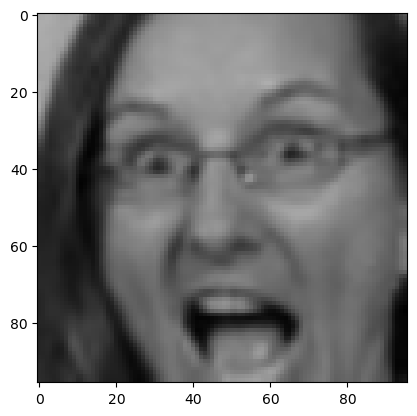

In [49]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [50]:
%time 
val_dataset = get_dataset(valid_df["img_path"] , valid_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
(64, 96, 96, 3)
(64, 7)


surprise


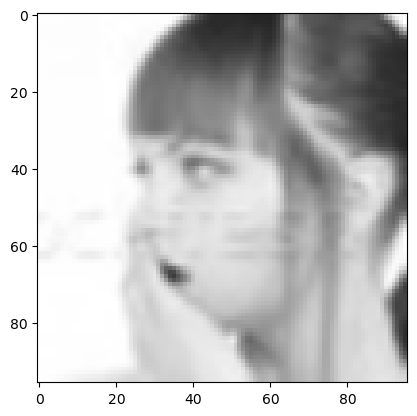

In [51]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [52]:
# Building EfficientNet model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                      

In [53]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [54]:
len(train_labels),len(valid_labels)

(28821, 7066)

In [55]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

In [56]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    callbacks=[early_stopping],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
450/450 [==============================] - 93s 177ms/step - loss: 1.2578 - accuracy: 0.8367 - precision: 0.8627 - recall: 0.8095 - val_loss: 10.3948 - val_accuracy: 0.2567 - val_precision: 0.2567 - val_recall: 0.2567
Epoch 2/12
450/450 [==============================] - 77s 172ms/step - loss: 1.3522 - accuracy: 0.8219 - precision: 0.8539 - recall: 0.7825 - val_loss: 17.3240 - val_accuracy: 0.2560 - val_precision: 0.2560 - val_recall: 0.2560
Epoch 3/12
450/450 [==============================] - 77s 172ms/step - loss: 1.5634 - accuracy: 0.8078 - precision: 0.8430 - recall: 0.7620 - val_loss: 9.9585 - val_accuracy: 0.2561 - val_precision: 0.2561 - val_recall: 0.2561


In [57]:
model.layers[0].trainable = False

In [58]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2)

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                      

In [60]:
# 2nd Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/8
450/450 [==============================] - ETA: 0s - loss: 1.4179 - accuracy: 0.7967 - precision: 0.8458 - recall: 0.7467
Epoch 1: val_loss improved from inf to 9.55412, saving model to best_weights.h5
450/450 [==============================] - 78s 172ms/step - loss: 1.4179 - accuracy: 0.7967 - precision: 0.8458 - recall: 0.7467 - val_loss: 9.5541 - val_accuracy: 0.2562 - val_precision: 0.2572 - val_recall: 0.2560
Epoch 2/8
450/450 [==============================] - ETA: 0s - loss: 1.4314 - accuracy: 0.7947 - precision: 0.8604 - recall: 0.7414
Epoch 2: val_loss did not improve from 9.55412
450/450 [==============================] - 77s 171ms/step - loss: 1.4314 - accuracy: 0.7947 - precision: 0.8604 - recall: 0.7414 - val_loss: 30.8738 - val_accuracy: 0.2562 - val_precision: 0.2563 - val_recall: 0.2562
Epoch 3/8
450/450 [==============================] - ETA: 0s - loss: 1.3361 - accuracy: 0.8006 - precision: 0.8605 - recall: 0.7461
Epoch 3: val_loss did not improve from 9.554

Save Objects

In [62]:
# Save Model
model.save("FacialExpressionModel.h5")

In [63]:
# Save Label Encoder 
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [64]:
save_object(Le, "LabelEncoder")

Real-World Test on Jupyter Notebook